# Description of Dataset
This dataset contains detailed meteorological information recorded in Albury, Australia, for a specific period. It includes 24 attributes for each day, capturing various aspects of the weather. These attributes include:

Date: The date of the weather observation.

Location: The location where the observation was made.

MinTemp: Minimum temperature of the day (in degrees Celsius).

MaxTemp: Maximum temperature of the day (in degrees Celsius).

Rainfall: Total rainfall recorded for the day (in millimeters).

Evaporation: Total evaporation recorded for the day (in millimeters).

Sunshine: Total hours of sunshine recorded for the day.

WindGustDir: The direction of the strongest wind gust during the day.

WindGustSpeed: The speed of the strongest wind gust during the day (in kilometers per hour).

WindDir9am: The wind direction at 9 AM.

WindDir3pm: The wind direction at 3 PM.

WindSpeed9am: The wind speed at 9 AM (in kilometers per hour).

WindSpeed3pm: The wind speed at 3 PM (in kilometers per hour).

Humidity9am: The humidity level at 9 AM (percentage).

Humidity3pm: The humidity level at 3 PM (percentage).

Pressure9am: The atmospheric pressure at 9 AM (in hPa).

Pressure3pm: The atmospheric pressure at 3 PM (in hPa).

Cloud9am: The cloud cover at 9 AM (measured in oktas).

Cloud3pm: The cloud cover at 3 PM (measured in oktas).

Temp9am: The temperature at 9 AM (in degrees Celsius).

Temp3pm: The temperature at 3 PM (in degrees Celsius).

RainToday: Indicator of whether it rained today (Yes or No).

RISK_MM: The amount of rain (in millimeters) recorded for the next day.

RainTomorrow: Indicator of whether it rained the next day (Yes or No).

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pickle

# Understanding the Dataset

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape


(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Handling Duplicates & Null Values

In [8]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
Date                 0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [11]:
# Iterative Imputer for filling null values
df.select_dtypes('number').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [12]:
df.drop(['Sunshine','Evaporation','Pressure3pm','Pressure3pm','Pressure9am','Temp9am','Temp3pm','MaxTemp','Date'],axis=1, inplace=True)

In [100]:
X = df[['Location','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday','RISK_MM']]
y = df['RainTomorrow']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [102]:
# Location	Rainfall	WindGustDir	WindGustSpeed	WindDir9am	WindDir3pm	Humidity9am	Humidity3pm	Cloud9am	Cloud3pm	RainToday	RISK_MM
imputer_numeric = IterativeImputer(max_iter=10, random_state=42)
num_cols = X_train.select_dtypes(include='number').columns

X_train[num_cols] = imputer_numeric.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_numeric.transform(X_test[num_cols])

with open("Files/numeric_imputer.pkl", "wb") as f:
    pickle.dump(imputer_numeric, f)

c:\Users\mena1\anaconda3\envs\ml_env313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [103]:
cat_cols = ['RainToday','WindDir3pm','WindDir9am','WindGustDir']
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_train[cat_cols] = imputer_categorical.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_categorical.transform(X_test[cat_cols])

with open("Files/categorical_imputer.pkl", "wb") as f:
    pickle.dump(imputer_categorical, f)

In [104]:
X_train.isna().sum().sort_values(ascending=False)

Location         0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RISK_MM          0
dtype: int64

# Visualization

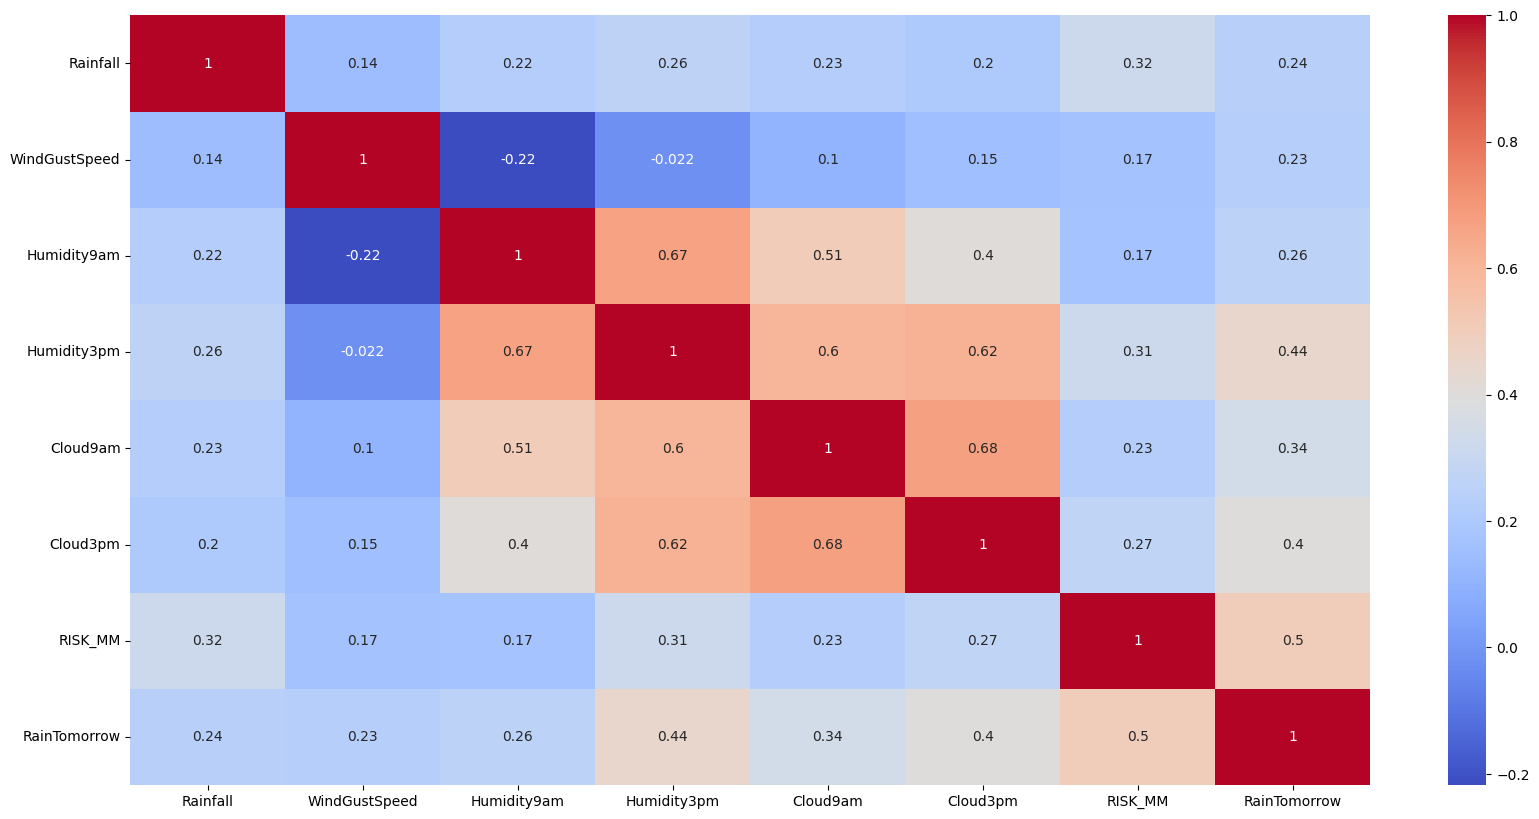

In [105]:
train_corr = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(train_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [106]:
#X_train.drop(['MinTemp','WindSpeed3pm','WindSpeed9am'], axis=1, inplace=True)
#X_test.drop(['MinTemp','WindSpeed3pm','WindSpeed9am'], axis=1, inplace=True)

In [107]:
#sns.lineplot(data=df,x='Month',y='RainTomorrow')

# Encoding

In [108]:
cat_cols = ['Location','WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday']
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

    with open(f'Files/{col}_label_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [109]:
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM
101064,28,0.0,9,56.0,2,10,52.000000,20.000000,3.000000,3.000000,0,0.0
18241,26,0.2,8,39.0,13,8,67.437928,49.162558,4.221353,4.260583,0,0.0
96741,0,0.0,15,43.0,7,12,64.000000,44.000000,3.962547,4.026361,0,0.0
139785,16,0.0,7,63.0,3,7,75.000000,54.000000,6.000000,4.000000,0,1.2
83246,7,0.0,0,30.0,9,0,58.000000,45.000000,7.000000,2.000000,0,0.0


# Outliers

In [110]:
X_train.describe()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,23.754699,2.376713,8.043242,39.906250,6.995649,7.787471,68.878667,51.527511,4.445889,4.483475,0.220959,2.364606
std,14.246779,8.520538,4.697419,13.195322,4.514882,4.545719,18.984671,20.684838,2.485935,2.319787,0.414895,8.585534
min,0.000000,-2.996017,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,-0.791194,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,31.000000,3.000000,4.000000,57.000000,37.000000,2.327971,2.820497,0.000000,0.000000
50%,24.000000,0.000000,9.000000,39.000000,7.000000,8.000000,70.000000,52.000000,4.665990,4.621402,0.000000,0.000000
75%,36.000000,0.800000,13.000000,46.000000,11.000000,12.000000,83.000000,66.000000,7.000000,6.600260,0.000000,0.800000
max,48.000000,371.000000,15.000000,135.000000,15.000000,15.000000,156.319650,228.827953,19.747636,21.658289,1.000000,371.000000


<Axes: xlabel='Humidity3pm'>

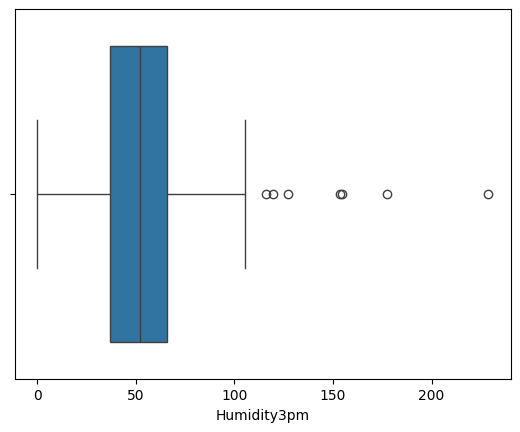

In [111]:
sns.boxplot(data=X_train, x='Humidity3pm')

In [112]:
X_train['Humidity3pm'].replace(228, df['Humidity3pm'].median(), inplace=True)

C:\Users\mena1\AppData\Local\Temp\ipykernel_31976\2556399313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Humidity3pm'].replace(228, df['Humidity3pm'].median(), inplace=True)


In [113]:
X_test.describe()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,23.684483,2.323107,8.122227,40.034105,7.018988,7.792538,68.894302,51.402232,4.455420,4.487130,0.222230,2.344984
std,14.200453,8.113479,4.681190,13.278413,4.513897,4.548811,18.968359,20.623844,2.481401,2.315006,0.415752,8.033454
min,0.000000,-3.815404,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,-0.175629,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,31.000000,3.000000,4.000000,57.000000,37.000000,2.360438,2.817985,0.000000,0.000000
50%,24.000000,0.000000,9.000000,39.000000,7.000000,8.000000,70.000000,52.000000,4.703757,4.646409,0.000000,0.000000
75%,36.000000,0.800000,13.000000,46.214006,11.000000,12.000000,83.000000,65.000000,7.000000,6.609672,0.000000,0.800000
max,48.000000,236.800000,15.000000,130.000000,15.000000,15.000000,105.465538,110.788812,10.727828,10.924941,1.000000,177.600000


# Scaling

In [114]:
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM
101064,28,0.0,9,56.0,2,10,52.000000,20.000000,3.000000,3.000000,0,0.0
18241,26,0.2,8,39.0,13,8,67.437928,49.162558,4.221353,4.260583,0,0.0
96741,0,0.0,15,43.0,7,12,64.000000,44.000000,3.962547,4.026361,0,0.0
139785,16,0.0,7,63.0,3,7,75.000000,54.000000,6.000000,4.000000,0,1.2
83246,7,0.0,0,30.0,9,0,58.000000,45.000000,7.000000,2.000000,0,0.0


windgustspeed->standard

cloud1,cloud2 -> min max

Rainfall, risk_mm -> yeo-johnson then standard


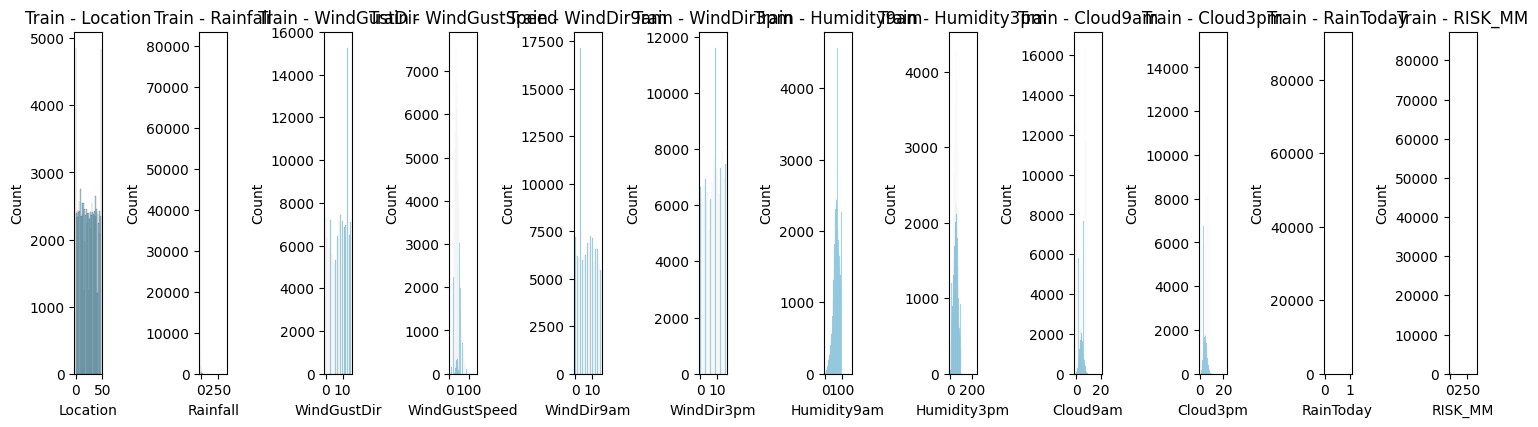

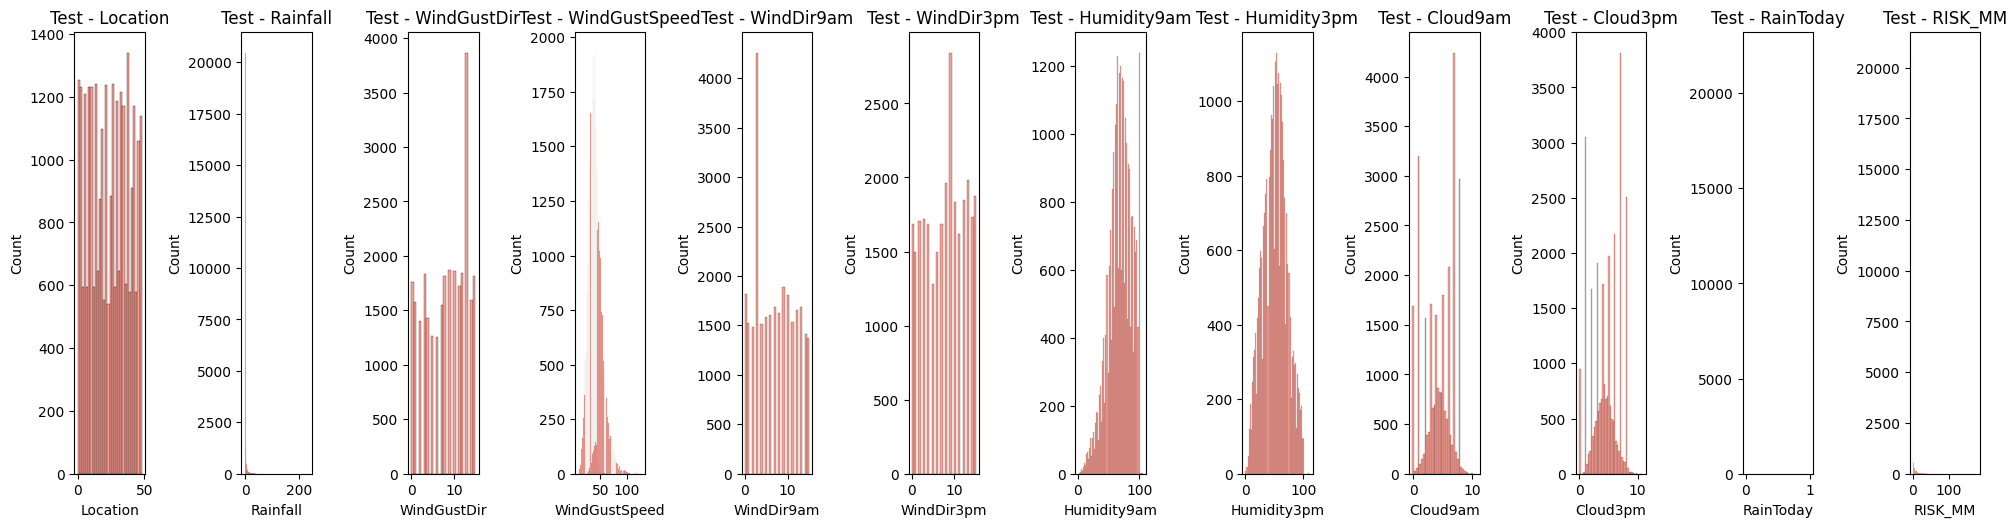

In [115]:
numeric_cols = X_train.columns
n_cols = 12
n_rows = (len(numeric_cols) + n_cols - 1)
# ================== Train ==================
plt.figure(figsize=(15, n_rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=X_train[col], color='skyblue', edgecolor='black')
    plt.title(f"Train - {col}")
    plt.tight_layout()
plt.show()

# ================== Test ==================
plt.figure(figsize=(20, n_rows*5))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=X_test[col], color='salmon', edgecolor='black')
    plt.title(f"Test - {col}")
    plt.tight_layout()
plt.show()


In [116]:
skew_values = X_train[numeric_cols].skew()
print(skew_values)

Location          0.017230
Rainfall         10.084754
WindGustDir      -0.217519
WindGustSpeed     0.905505
WindDir9am        0.172521
WindDir3pm       -0.113187
Humidity9am      -0.487423
Humidity3pm       0.042573
Cloud9am         -0.209633
Cloud3pm         -0.162692
RainToday         1.345139
RISK_MM          10.246865
dtype: float64


In [117]:
standard_cols = ['WindGustSpeed']
minmax_cols = ['Cloud9am','Cloud3pm']
yeo_standard_cols = ['Rainfall','RISK_MM']

In [118]:
scaler_std = StandardScaler()
X_train[standard_cols] = scaler_std.fit_transform(X_train[standard_cols])
X_test[standard_cols] = scaler_std.transform(X_test[standard_cols])

with open('scaler_std.pkl', 'wb') as f:
    pickle.dump(scaler_std, f)
print('Done')

Done


In [119]:
scaler_mm = MinMaxScaler()
X_train[minmax_cols] = scaler_mm.fit_transform(X_train[minmax_cols])
X_test[minmax_cols] = scaler_mm.transform(X_test[minmax_cols])

with open('scaler_mm.pkl', 'wb') as f:
    pickle.dump(scaler_mm, f)
print('Done')

Done


In [120]:
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
X_train[yeo_standard_cols] = pt_yeo_johnson.fit_transform(X_train[yeo_standard_cols])
X_test[yeo_standard_cols] = pt_yeo_johnson.transform(X_test[yeo_standard_cols])

with open('pt_yeo_johnson.pkl', 'wb') as f:
    pickle.dump(pt_yeo_johnson, f)
print('Done')

Done


# Feature Selection

In [121]:
X_train_c = X_train_c.drop('Date',axis=1)

In [122]:
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for col in cat_cols:
    le = LabelEncoder()
    X_train_c[col] = le.fit_transform(X_train_c[col])
    X_test_c[col] = le.transform(X_test_c[col])


In [123]:
rf = RandomForestClassifier()
rf.fit(X_train_c, y_train_c)
importance = pd.Series(rf.feature_importances_, index=X_train_c.columns)
top_features = importance.nlargest().index.tolist()
print('Top features by Random Forest:',top_features)

Top features by Random Forest: ['RISK_MM', 'Humidity3pm', 'Rainfall', 'RainToday', 'Sunshine']


In [124]:
print(list(X_train.columns))

['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM']


# The Models

In [125]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    #"SVC": SVC(),
    "GaussianNB": GaussianNB(),
}

<string>:20: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
<string>:20: SyntaxWarning: invalid escape sequence '\{'
<>:20: SyntaxWarning: invalid escape sequence '\{'
C:\Users\mena1\AppData\Local\Temp\ipykernel_31976\1528680016.py:20: SyntaxWarning: invalid escape sequence '\{'
  filename = f'Files\{name}.pkl'
c:\Users\mena1\anaconda3\envs\ml_env313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


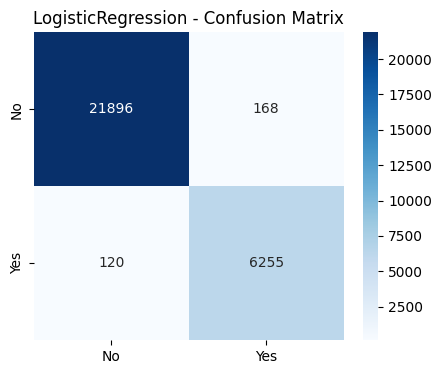

Saving Model 'LogisticRegression' is Done


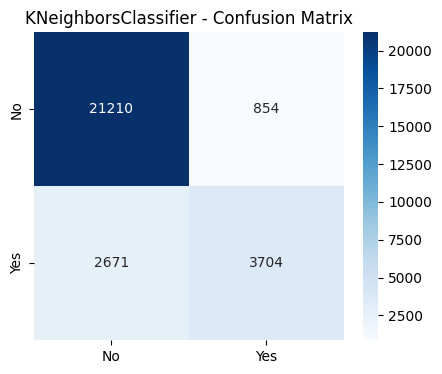

Saving Model 'KNeighborsClassifier' is Done


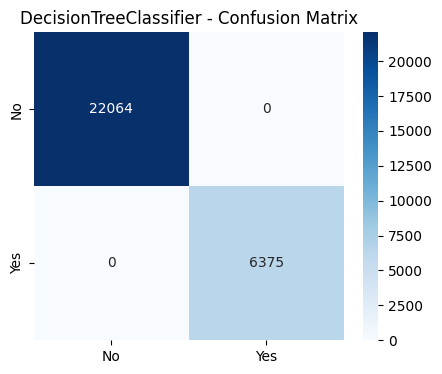

Saving Model 'DecisionTreeClassifier' is Done


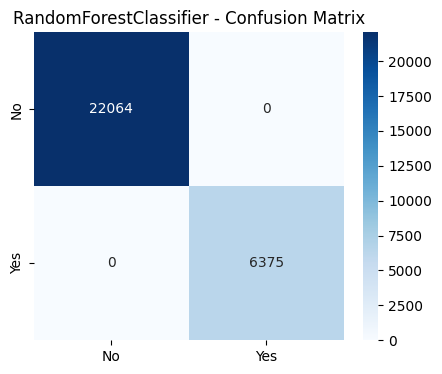

Saving Model 'RandomForestClassifier' is Done


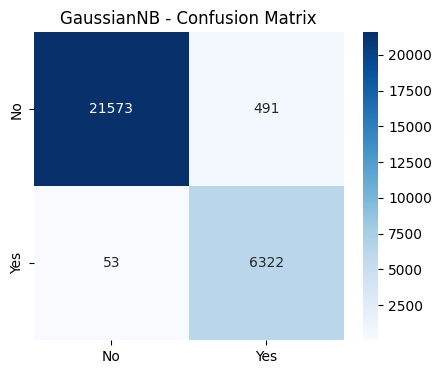

Saving Model 'GaussianNB' is Done


In [126]:
metrics_list = []
class_names = ['No','Yes']
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    metrics_list.append([name, acc, pre, rec, f1])
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    filename = f'Files\{name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saving Model '{name}' is Done")

In [127]:
results_df = pd.DataFrame(metrics_list, columns=['Model','Accuracy','Precision','Recall','F1'])
results_df.sort_values('Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.989873,0.973844,0.981176,0.977496
1,KNeighborsClassifier,0.876050,0.812637,0.581020,0.677582
2,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
3,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
4,GaussianNB,0.980871,0.927932,0.991686,0.958750
